# **Installing Libraries**

In [2]:
#installing cvlib
!pip install cvlib

     |████████████████████████████████| 10.0 MB 9.3 MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.6-py3-none-any.whl size=10044619 sha256=99555e3b7cd564837323c0fa394699c54f13104396ad296bff1793c56d180a80
  Stored in directory: /root/.cache/pip/wheels/9b/96/9b/373c07517ffe0bedbebc0813aec1e62cb2bb1dee91b3694895
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=9a67aa64e5d36653a9a2c916ad4db7a61c4f449da27dfe288ef4a4f3ba6af9e4
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built cvlib progressbar


# **Importing Libraries**

In [12]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [13]:
#Importing the required Libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob

# **Extracting Features**

In [14]:
#Defining path of the dataset
path = '/content/gdrive/MyDrive/Gender Detection/gender_dataset_face/'
categories = ['man','woman']

In [15]:
#converting images into numpy array
photos = []
labels = []
for cat in categories:
  temp = path+cat+'/'
  for i in os.listdir(path+cat):
    img = cv2.imread(temp+i)
    img = cv2.resize(img,(96,96))
    photos.append(img)
    labels.append(categories.index(cat))
#Storing array images into single file for later usage
photos = np.array(photos)
labels = np.array(labels)
np.save('/content/gdrive/MyDrive/Gender Detection/Features.npy',photos)
np.save('/content/gdrive/MyDrive/Gender Detection/Labels.npy',labels)

# **Preprocessing**

In [16]:
#Load the stored image array into variables x and y
X = np.load('/content/gdrive/MyDrive/Gender Detection/Features.npy')
y = np.load('/content/gdrive/MyDrive/Gender Detection/Labels.npy')

In [ ]:
#Split 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=True)

In [ ]:
#Preprocessing the features
X_train = X_train.reshape(X_train.shape[0],96,96,3).astype('float32')
X_test = X_test.reshape(X_test.shape[0],96,96,3).astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
#Labels Preprocessing
y_train = np_utils.to_categorical(y_train).astype('float32')
y_test = np_utils.to_categorical(y_test).astype('float32')

In [ ]:
#Since we have less number of images we use ImageDataGenerator function to generate more images
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode="nearest")

# **Training**

In [ ]:
#Model Definition
def getmodel():
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu', input_shape=(96,96,3)))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(128, (3,3), activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dense(2, activation='softmax'))
  return model
  

In [ ]:
model = getmodel()

In [ ]:
#Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Training the model
model.fit_generator(aug.flow(X_train, y_train, batch_size=100), epochs=100, validation_data=(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
19/19 [==============================] - 6s 281ms/step - loss: 0.7451 - accuracy: 0.5003 - val_loss: 0.6915 - val_accuracy: 0.5065
Epoch 2/100
19/19 [==============================] - 5s 272ms/step - loss: 0.6900 - accuracy: 0.5229 - val_loss: 0.6780 - val_accuracy: 0.5195
Epoch 3/100
19/19 [==============================] - 5s 266ms/step - loss: 0.6457 - accuracy: 0.6402 - val_loss: 0.6006 - val_accuracy: 0.7229
Epoch 4/100
19/19 [==============================] - 5s 263ms/step - loss: 0.5875 - accuracy: 0.6773 - val_loss: 0.5664 - val_accuracy: 0.7165
Epoch 5/100
19/19 [==============================] - 5s 264ms/step - loss: 0.5211 - accuracy: 0.7487 - val_loss: 0.3702 - val_accuracy: 0.8874
Epoch 6/100
19/19 [==============================] - 5s 271ms/step - loss: 0.4505 - accuracy: 0.7825 - val_loss: 0.3024 - val_accuracy: 0.8874
Epoch 7/100
19/19 [==============================] - 5s 261ms/step - loss: 0.4016 - accuracy: 0.8231 - val_loss: 0.2326 - val_accuracy: 0.9156

In [ ]:
#Stroring the model in some location
model.save('/content/gdrive/MyDrive/Gender Detection/model.h5')

# **Testing**

In [3]:
#Using model for images
from keras.models import load_model
import cv2
import cvlib as cv
import matplotlib.pyplot as plt
import numpy as np

In [5]:
model = load_model('/content/drive/MyDrive/Gender Detection/model.h5')

In [6]:
#This function predicts the gender
def preprocess(path):
  labels = ['Male','Female']
  img = cv2.imread(path)
  faces = cv.detect_face(img)
  ans = []
  plt.figure(figsize=(20,10))
  for i in faces[0]:
    x1, y1, x2, y2 = i
    cv2.rectangle(img,(x1, y1),(x2, y2), (0,255,0), 2)
    face_crop = np.copy(img[y1:y2, x1:x2])
    face_crop = cv2.resize(face_crop,(96, 96))
    face_crop = face_crop/255.0
    face_crop = np.expand_dims(face_crop, axis=0)
    y_pred = model.predict(face_crop)
    cat = labels[y_pred.argmax()] + str(round(y_pred[0][y_pred.argmax()]*100.0,2))+'%'
    Y = y1 - 10 if y1 - 10 > 10 else y1 + 10
    cv2.putText(img, cat, (x1, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
  plt.imshow(img)
  return ans


[]

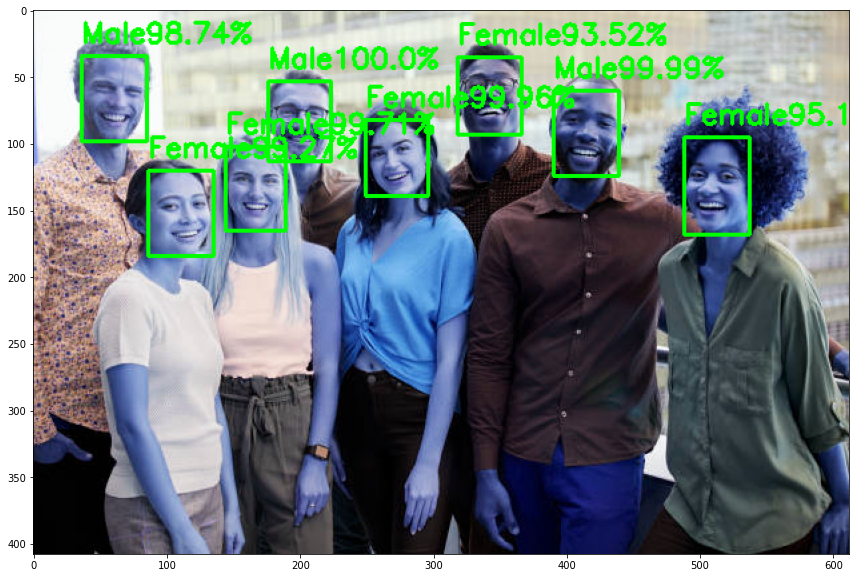

In [11]:
preprocess('/content/drive/MyDrive/Gender Detection/Test/grp.jpg')